In [1]:
from tensorflow.keras import datasets 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
plt.style.use('seaborn')
import statsmodels.api as sm
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
crop_name = {
    1 : ['Rice' , 'Mango', 'Papaya' ],
    2 : ['Cotton', 'Jute', 'Watermelon', 'Muskmelon', 'Banana', 'Orange'],
    3 : ['Jute', 'Watermelon', 'Muskmelon'],
    4 : ['Rice', 'Jute', 'Watermelon', 'Muskmelon', 'Cotton', 'Jute',  'Banana', 'Orange' ],
    5 : ['Pomegranate'],
    6 : ['Apple', 'Grape', 'Pomegranate'],
    7 : ['Lentil'],
    8 : ['Lentil' , 'Jute', 'Watermelon', 'Muskmelon']
}


#Feature Selection and PreProcessing

In [3]:
df = pd.read_csv("final_data.csv")

In [4]:


X = df[['pH', 'EC', 'OC', 'N', 'P', 'K', 'S', 'Ca', 'Mg', 'Zn', 'Cu',
       'Fe', 'Mn','Tex']]
y = df['label']

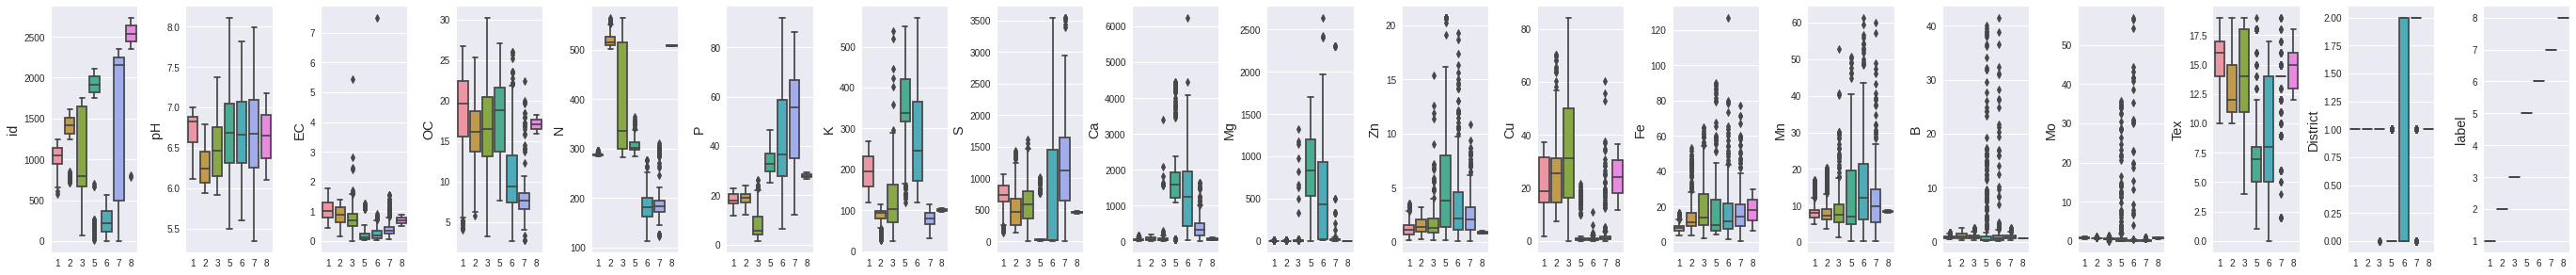

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(len(df.columns)*2,4))
for index, col in enumerate(df.columns):
    ax = axes[index]
    sns.boxplot(y=df.loc[:,col], x=df.loc[:,'label'], ax=ax)
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
    ax.set_xlabel("")
plt.tight_layout(pad=0.5)
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.District= le.fit_transform(df.District.values)

In [7]:
df.Tex= le.fit_transform(df.Tex.values)

In [8]:
X

,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,Tex
0,7.050000,0.160000,5.560000,175.620000,38.260000,324.800000,5.210000,1884,288.000000,1.820000,0.200000,2.830000,2.800000,2
1,6.880000,0.089000,4.240000,125.440000,26.300000,103.000000,10.420000,1484,336.000000,1.620000,0.450000,6.270000,5.600000,2
2,5.600000,0.081000,2.780000,150.530000,25.700000,53.800000,7.810000,1644,504.000000,2.840000,0.440000,21.080000,24.110000,5
3,7.300000,0.164000,10.540000,188.160000,24.700000,190.400000,10.420000,1364,840.000000,7.740000,0.630000,16.420000,11.400000,2
4,7.220000,0.167000,11.410000,163.070000,40.000000,210.600000,10.420000,2004,168.000000,11.890000,0.610000,7.380000,2.910000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,6.531352,0.659126,17.283696,507.723181,28.210970,99.076266,464.099932,57,1.407825,0.908700,26.714008,20.307160,8.306451,14
2733,6.570766,0.672140,17.198919,507.854437,28.107230,99.429503,462.612618,60,1.410428,0.898288,25.791129,19.426670,8.329504,14
2734,6.989972,0.810557,16.297230,509.250472,27.003848,103.186541,446.793514,93,1.438111,0.787555,15.975375,10.061760,8.574701,16
2735,6.737222,0.727102,16.840881,508.408768,27.669104,100.921331,456.331240,73,1.421420,0.854319,21.893534,15.708094,8.426866,15


In [9]:
y

0       6
1       7
2       7
3       6
4       6
       ..
2732    8
2733    8
2734    8
2735    8
2736    8
Name: label, Length: 2737, dtype: int64

In [10]:
X = (X - X.mean())/X.std()
X

,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,Tex
0,1.048506,-1.037491,-1.677114,-1.226424,0.557077,1.249438,-1.023138,1.526581,0.178608,-0.192447,-0.946238,-1.027180,-0.943989,-2.426073
1,0.650186,-1.200279,-1.911359,-1.594217,-0.124451,-0.593699,-1.014431,1.071609,0.288384,-0.255630,-0.931182,-0.754868,-0.599579,-2.426073
2,-2.348933,-1.218622,-2.170448,-1.410321,-0.158642,-1.002546,-1.018793,1.253598,0.672599,0.129790,-0.931784,0.417502,1.677216,-1.721297
3,1.634272,-1.028320,-0.793373,-1.134513,-0.215626,0.132587,-1.014431,0.935117,1.441030,1.677788,-0.920342,0.048613,0.113841,-2.426073
4,1.446827,-1.021441,-0.638984,-1.318409,0.656229,0.300447,-1.014431,1.663073,-0.095832,2.988847,-0.921546,-0.666999,-0.930458,-2.426073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,-0.166718,0.106901,0.403351,1.207717,-0.015557,-0.626305,-0.256227,-0.551505,-0.476827,-0.480343,0.650537,0.356323,-0.266676,0.393030
2733,-0.074369,0.136739,0.388306,1.208679,-0.021468,-0.623369,-0.258713,-0.548092,-0.476821,-0.483632,0.594957,0.286623,-0.263840,0.393030
2734,0.907857,0.454101,0.228294,1.218911,-0.084343,-0.592149,-0.285150,-0.510557,-0.476758,-0.518615,0.003815,-0.454709,-0.233680,0.862880
2735,0.315649,0.262756,0.324770,1.212742,-0.046434,-0.610972,-0.269211,-0.533306,-0.476796,-0.497523,0.360229,-0.007742,-0.251865,0.627955


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2189, 14) (548, 14) (2189,) (548,)


#Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)
# providing the training dataset
classifer.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
y_pred = classifer.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

# accuracy
graph = accuracy_score(y_pred,y_test)
graph

0.9945255474452555

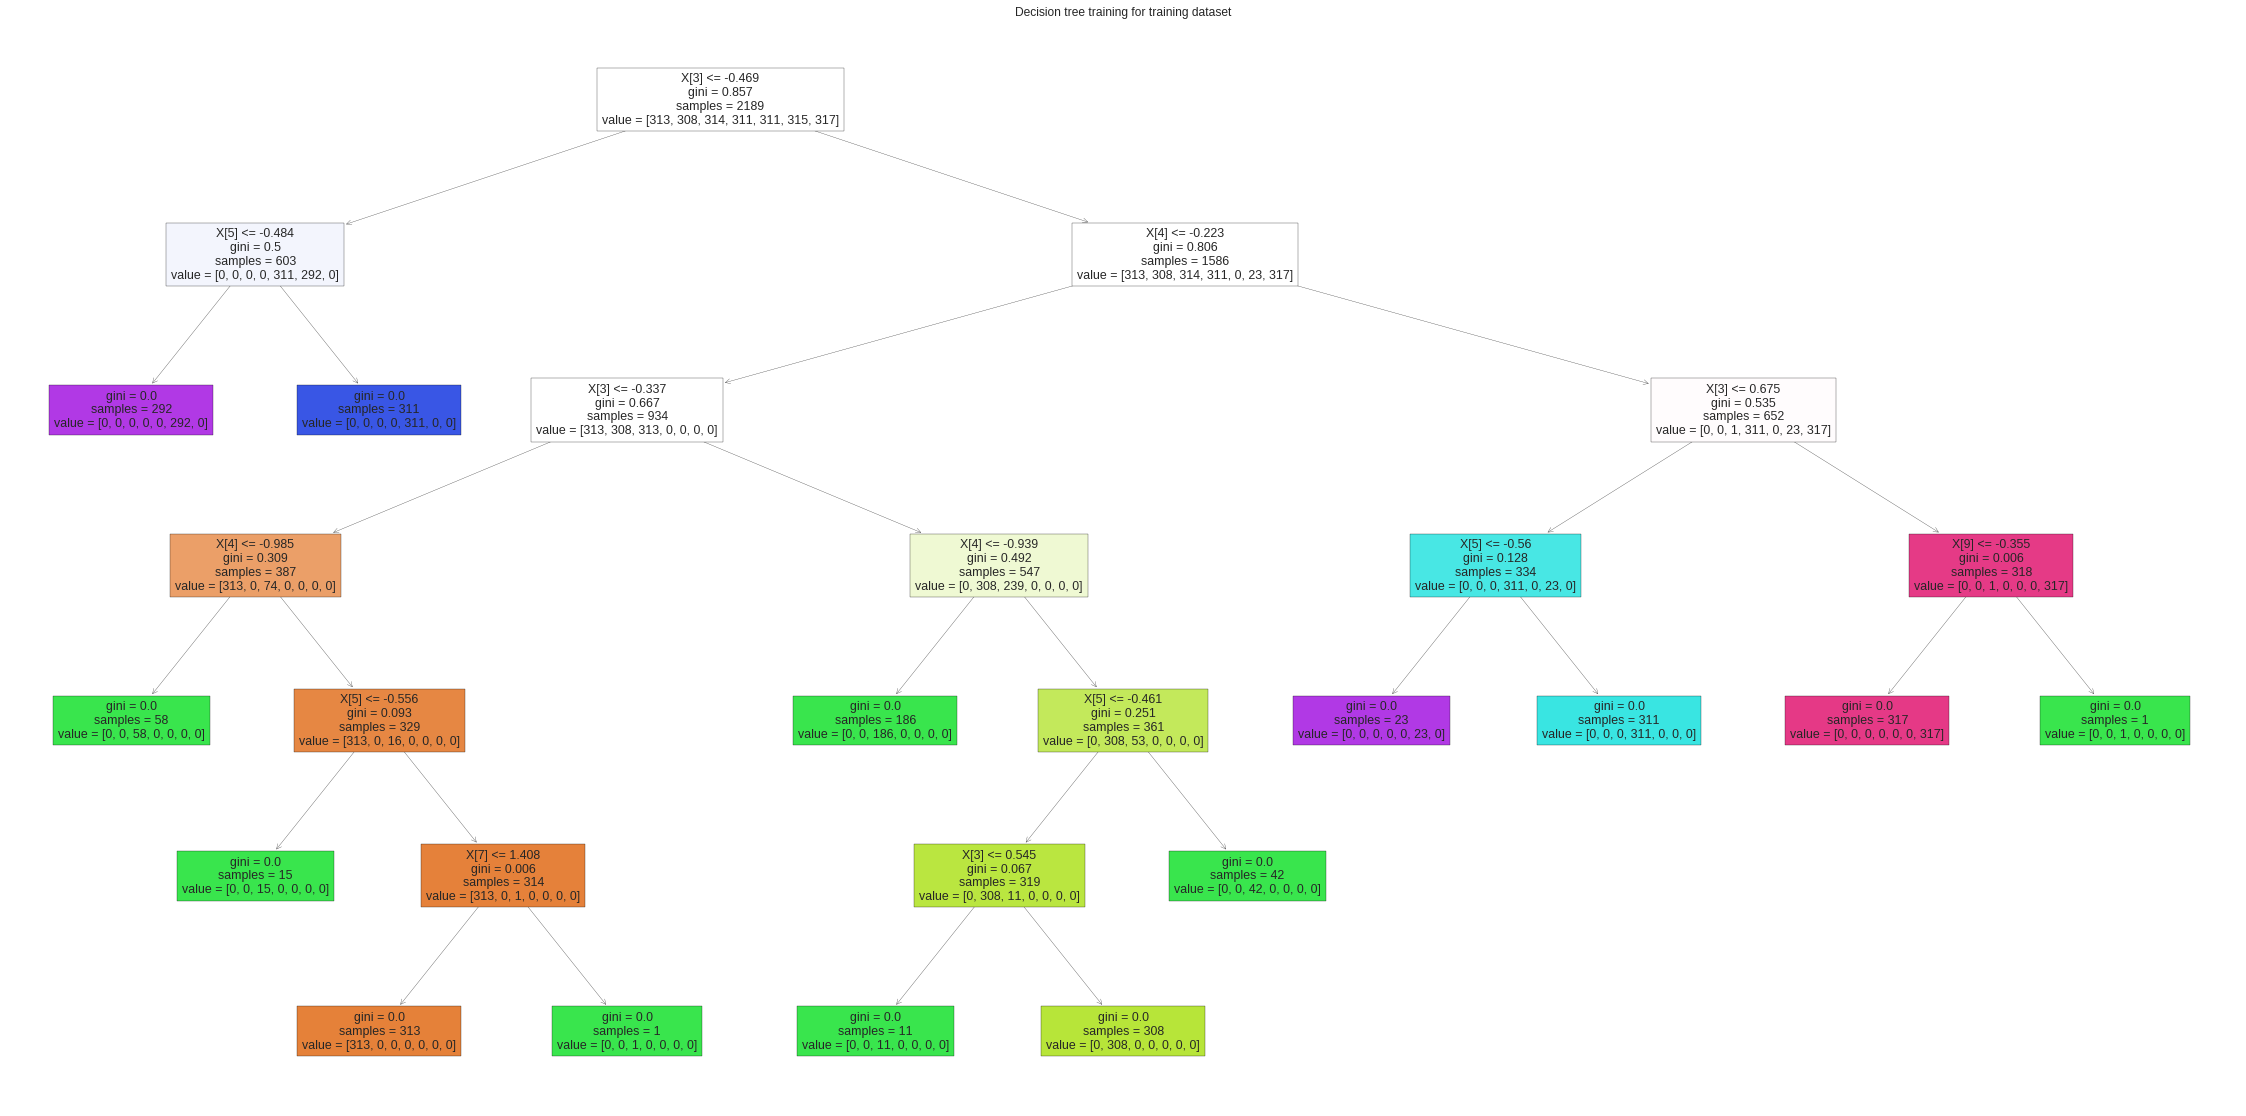

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

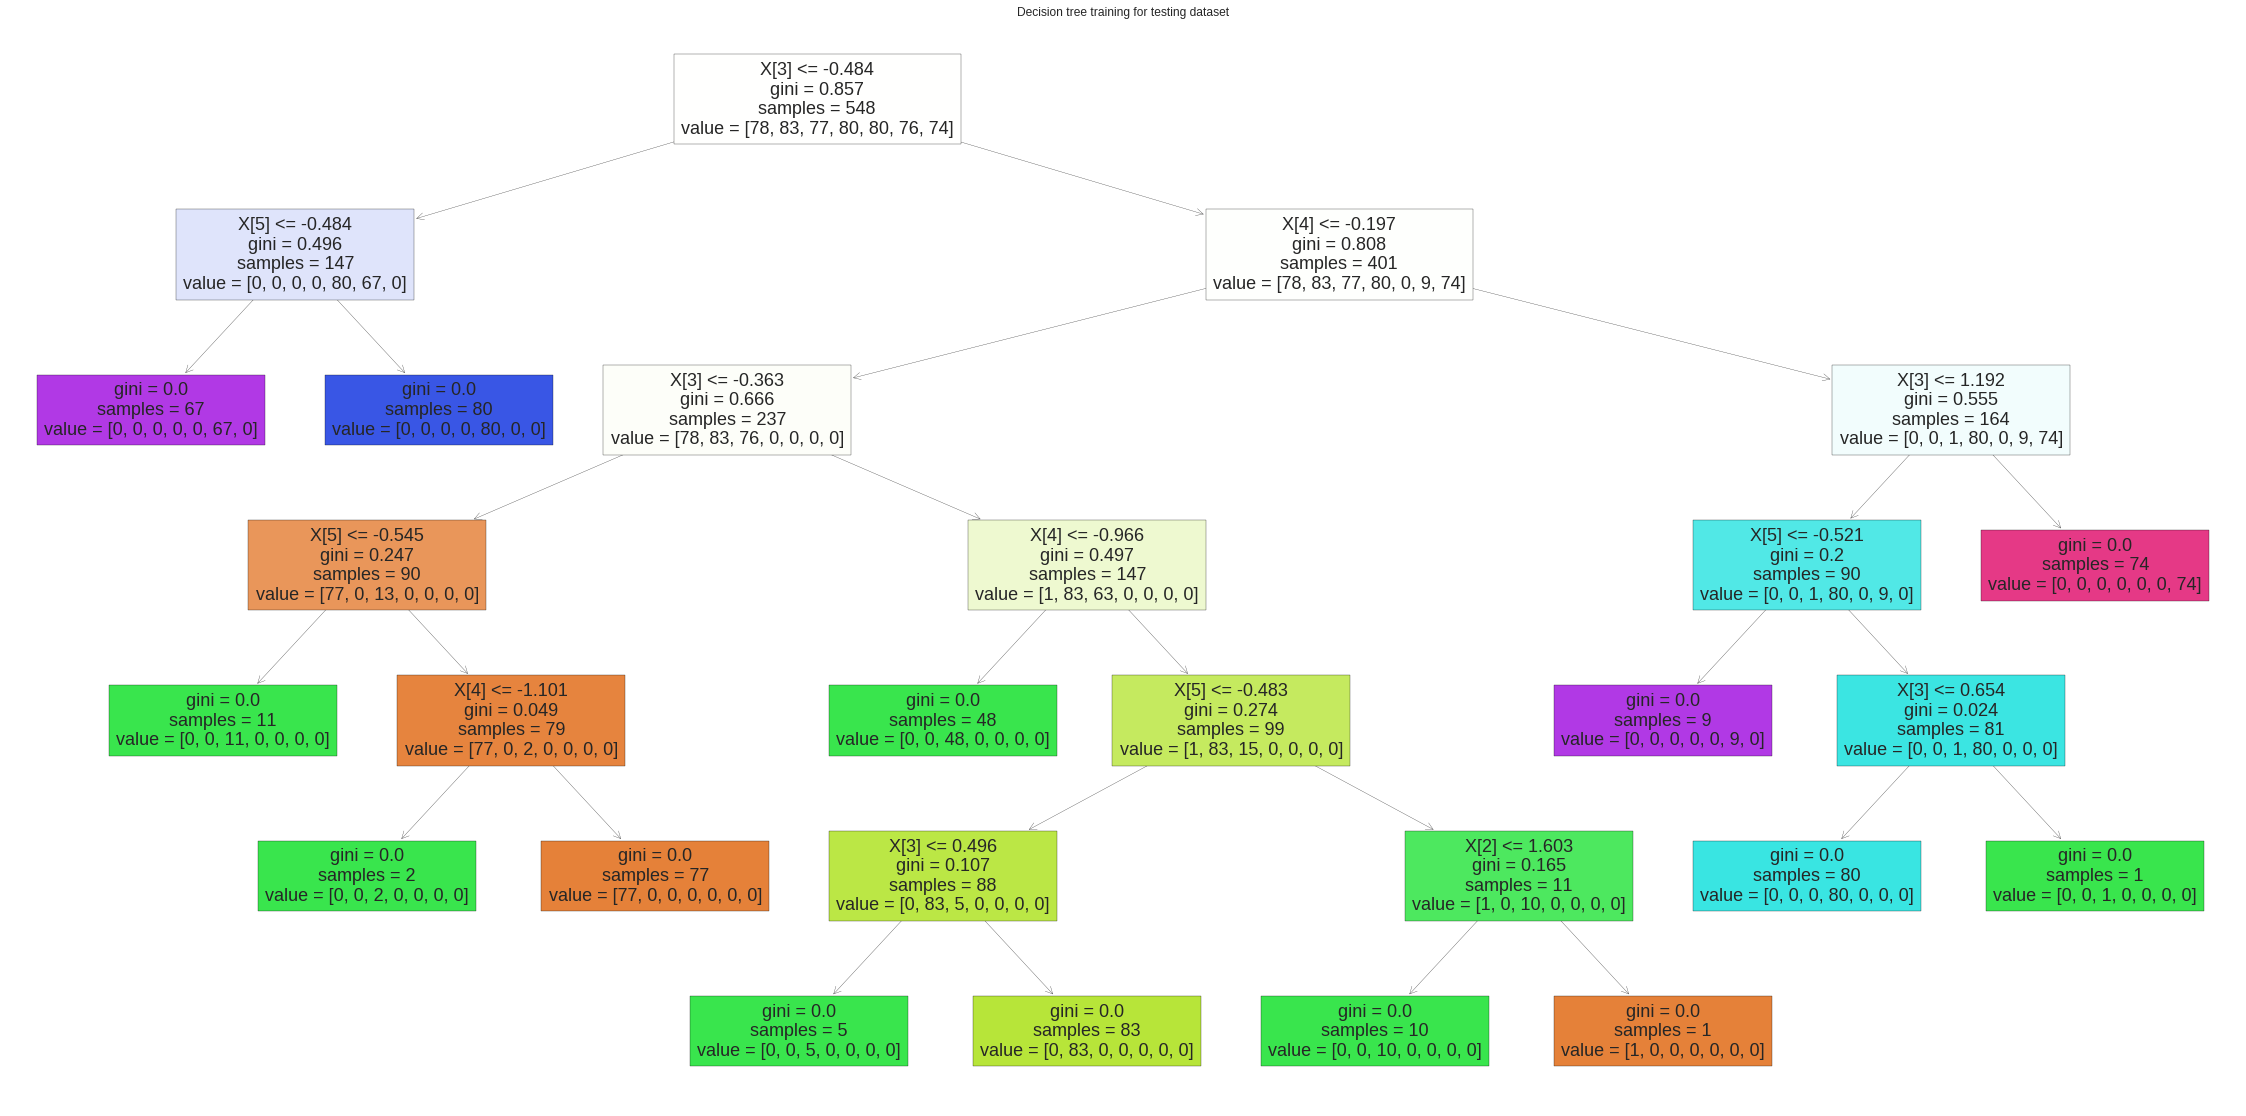

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_test, y_test)
plot_tree(clf, filled=True)
plt.title("Decision tree training for testing dataset")
plt.show()

In [17]:
from sklearn import tree

# text based tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= -0.48
|   |--- feature_5 <= -0.48
|   |   |--- class: 7
|   |--- feature_5 >  -0.48
|   |   |--- class: 6
|--- feature_3 >  -0.48
|   |--- feature_4 <= -0.20
|   |   |--- feature_3 <= -0.36
|   |   |   |--- feature_5 <= -0.55
|   |   |   |   |--- class: 3
|   |   |   |--- feature_5 >  -0.55
|   |   |   |   |--- feature_4 <= -1.10
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_4 >  -1.10
|   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  -0.36
|   |   |   |--- feature_4 <= -0.97
|   |   |   |   |--- class: 3
|   |   |   |--- feature_4 >  -0.97
|   |   |   |   |--- feature_5 <= -0.48
|   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_5 >  -0.48
|   |   |   |   |   |--- feature_2 <= 1.60
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_2 >  1.60
|   |   |   |   |   |   |--- class: 1
|   

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        78
           2       1.00      1.00      1.00        83
           3       1.00      0.96      0.98        77
           5       0.99      1.00      0.99        80
           6       1.00      1.00      1.00        80
           7       0.97      1.00      0.99        76
           8       1.00      1.00      1.00        74

    accuracy                           0.99       548
   macro avg       0.99      0.99      0.99       548
weighted avg       0.99      0.99      0.99       548



#SVM

In [19]:
from tensorflow.keras import datasets 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
plt.style.use('seaborn')
import statsmodels.api as sm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [20]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [21]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [22]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
graph2 = poly_accuracy*100

Accuracy (Polynomial Kernel):  94.16
F1 (Polynomial Kernel):  94.17


In [23]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  83.94
F1 (RBF Kernel):  84.93


In [24]:
print(classification_report(poly_pred, y_test))


              precision    recall  f1-score   support

           1       1.00      0.87      0.93        90
           2       0.95      0.96      0.96        82
           3       0.88      1.00      0.94        68
           5       0.97      1.00      0.99        78
           6       0.85      1.00      0.92        68
           7       0.93      0.87      0.90        82
           8       1.00      0.93      0.96        80

    accuracy                           0.94       548
   macro avg       0.94      0.95      0.94       548
weighted avg       0.95      0.94      0.94       548



#ANN Model-1

In [25]:
from tensorflow.keras import datasets 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import cv2
plt.style.use('seaborn')
import statsmodels.api as sm
import tensorflow as tf

In [26]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
from tensorflow.keras.layers import Flatten, Dense, InputLayer

In [29]:
hp_hidden_units = 128
hp_epoch = 30
hp_batch_size = 5
hp_lr = float(1/10)


In [30]:
l1 = Dense(15)
l2 = Dense(10, activation = tf.nn.relu)
l3 = Dense(10)
l4 = Dense(10,activation = tf.nn.relu)
l5 = Dense(30, activation = tf.nn.sigmoid)
m1 = keras.models.Sequential(
    [l1, l2, l3, l4, l5]
)


In [31]:
m1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           optimizer='rmsprop',
           metrics=["accuracy"])


In [32]:
history1 =m1.fit(X_train, y_train, batch_size= hp_batch_size, epochs=hp_epoch)

Epoch 1/30
438/438 [==============================] - 1s 1ms/step - loss: 2.8940 - accuracy: 0.3011
Epoch 2/30
438/438 [==============================] - 1s 1ms/step - loss: 2.5855 - accuracy: 0.3664
Epoch 3/30
438/438 [==============================] - 1s 1ms/step - loss: 2.5665 - accuracy: 0.3614
Epoch 4/30
438/438 [==============================] - 1s 2ms/step - loss: 2.5525 - accuracy: 0.3700
Epoch 5/30
438/438 [==============================] - 1s 2ms/step - loss: 2.5422 - accuracy: 0.3824
Epoch 6/30
438/438 [==============================] - 1s 1ms/step - loss: 2.5354 - accuracy: 0.4029
Epoch 7/30
438/438 [==============================] - 1s 1ms/step - loss: 2.5313 - accuracy: 0.4153
Epoch 8/30
438/438 [==============================] - 1s 1ms/step - loss: 2.5291 - accuracy: 0.4121
Epoch 9/30
438/438 [==============================] - 1s 1ms/step - loss: 2.5278 - accuracy: 0.4171
Epoch 10/30
438/438 [==============================] - 1s 1ms/step - loss: 2.5269 - accuracy: 0.4299

In [33]:
p1 = m1.predict(X_test)

18/18 [==============================] - 0s 1ms/step


In [34]:
import numpy as np
p1_reduced = [np.argmax(pr) for pr in p1]
p1_reduced[58]


1

In [35]:
from sklearn.metrics import accuracy_score
print("Model 1: " + str(accuracy_score(p1_reduced, y_test)))
graph3= accuracy_score(p1_reduced, y_test)


Model 1: 0.4306569343065693


In [36]:
y_test[58]

1.0

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [38]:
matrix = confusion_matrix(y_test,p1_reduced)
matrix

array([[78,  0,  0,  0,  0,  0,  0],
       [83,  0,  0,  0,  0,  0,  0],
       [76,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 12, 68,  0,  0],
       [ 0,  0,  0,  4, 71,  5,  0],
       [ 1,  0,  0,  0,  0, 75,  0],
       [74,  0,  0,  0,  0,  0,  0]])

In [39]:
print(classification_report(y_test,p1_reduced))


              precision    recall  f1-score   support

         1.0       0.25      1.00      0.40        78
         2.0       0.00      0.00      0.00        83
         3.0       0.00      0.00      0.00        77
         5.0       0.75      0.15      0.25        80
         6.0       0.51      0.89      0.65        80
         7.0       0.94      0.99      0.96        76
         8.0       0.00      0.00      0.00        74

    accuracy                           0.43       548
   macro avg       0.35      0.43      0.32       548
weighted avg       0.35      0.43      0.32       548



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
df.to_csv('file_name.csv', encoding='utf-8')

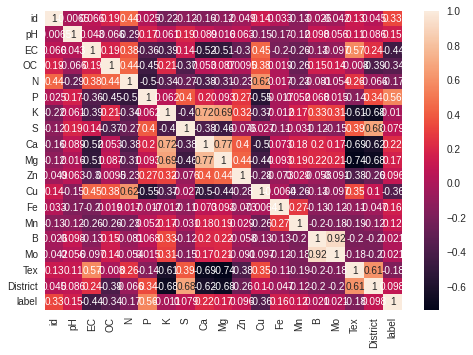

In [41]:
sns.heatmap(df.corr(),annot=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                225       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 30)                330       
                                                                 
Total params: 935
Trainable params: 935
Non-trainable params: 0
_________________________________________________________________
None


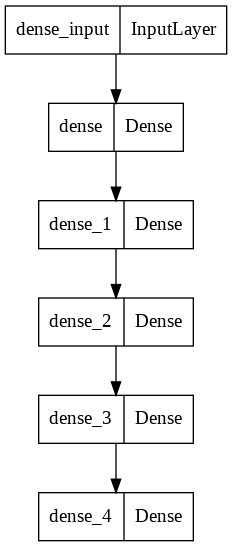

In [42]:
from tensorflow.keras.utils import plot_model
print(m1.summary())
plot_model(m1, to_file='m1.png', show_shapes=False, show_layer_names=True)

#ANN model-2

In [43]:
hp_hidden_units =20
hp_epoch = 10
hp_batch_size = 3
hp_lr = float(1/10)

In [44]:
l1 = Dense(20)
l2 = Dense(hp_hidden_units, activation = tf.nn.relu)
l3 = Dense(20, activation = tf.nn.relu)
l4 = Dense(10, activation = tf.nn.relu)
l5 = Dense(10, activation = tf.nn.softmax)
m2 = keras.models.Sequential(
    [l1, l2, l3, l4, l5]
)

In [45]:
import keras
from keras.callbacks import EarlyStopping


m2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           
           optimizer='rmsprop',
           metrics=["accuracy"])

In [46]:
history2 =m2.fit(X_train, y_train, batch_size= hp_batch_size, epochs=hp_epoch, validation_split=0.2,
                 shuffle=True, verbose=1
                 
                    )

Epoch 1/10
584/584 [==============================] - 2s 2ms/step - loss: 2.0536 - accuracy: 0.4192 - val_loss: 1.8380 - val_accuracy: 0.6438
Epoch 2/10
584/584 [==============================] - 1s 2ms/step - loss: 1.7292 - accuracy: 0.7721 - val_loss: 1.6352 - val_accuracy: 0.8607
Epoch 3/10
584/584 [==============================] - 1s 1ms/step - loss: 1.6260 - accuracy: 0.8572 - val_loss: 1.5797 - val_accuracy: 0.8950
Epoch 4/10
584/584 [==============================] - 1s 2ms/step - loss: 1.5883 - accuracy: 0.8795 - val_loss: 1.5708 - val_accuracy: 0.9018
Epoch 5/10
584/584 [==============================] - 1s 2ms/step - loss: 1.5775 - accuracy: 0.8903 - val_loss: 1.5537 - val_accuracy: 0.9132
Epoch 6/10
584/584 [==============================] - 1s 2ms/step - loss: 1.5726 - accuracy: 0.8909 - val_loss: 1.5499 - val_accuracy: 0.9224
Epoch 7/10
584/584 [==============================] - 1s 2ms/step - loss: 1.5690 - accuracy: 0.8926 - val_loss: 1.5496 - val_accuracy: 0.9178
Epoch 

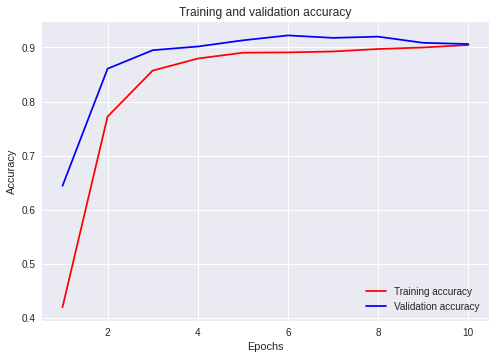

In [47]:
history_dict = history2.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot

# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

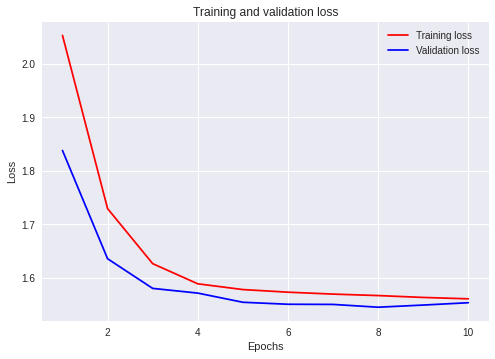

In [48]:
# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot

# "r" is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

18/18 [==============================] - 0s 1ms/step
[5.4951645e-19 8.6653708e-06 5.3822119e-03 9.9446285e-01 1.4905756e-18
 1.0585997e-12 7.0012129e-10 1.4631324e-04 4.8127277e-15 1.1643475e-18]
1.0
              precision    recall  f1-score   support

         1.0       0.92      1.00      0.96        78
         2.0       0.97      1.00      0.98        83
         3.0       0.99      0.87      0.92        77
         5.0       0.96      0.90      0.93        80
         6.0       0.86      0.54      0.66        80
         7.0       0.62      0.89      0.73        76
         8.0       1.00      1.00      1.00        74

    accuracy                           0.89       548
   macro avg       0.90      0.89      0.88       548
weighted avg       0.90      0.89      0.88       548



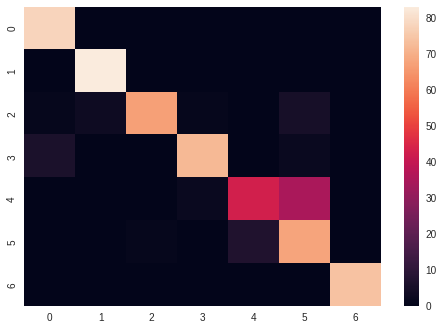

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.color_palette("Set2")
preds = m2.predict(X_test) 
print(preds[0]) 
print(np.sum(preds[0])) 

matrix = confusion_matrix(y_test, preds.argmax(axis=1))
matrix
print(classification_report(y_test, preds.argmax(axis=1)))
sns.heatmap(matrix)

In [50]:
crop_name[np.argmax(preds[102])]

['Lentil']

In [51]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,preds.argmax(axis=1))
graph4=accuracy_score(y_test,preds.argmax(axis=1))

In [52]:
crop_name[y_test[102]]

['Apple', 'Grape', 'Pomegranate']

In [53]:
preds.argmax(axis=1)

array([3, 6, 3, 3, 8, 5, 8, 5, 1, 7, 1, 7, 5, 5, 8, 5, 8, 5, 5, 8, 5, 7,
       8, 1, 3, 8, 3, 5, 7, 2, 1, 1, 1, 3, 5, 8, 2, 5, 2, 5, 7, 7, 8, 7,
       2, 1, 1, 2, 7, 5, 1, 8, 7, 7, 5, 1, 3, 7, 1, 3, 1, 8, 5, 1, 5, 1,
       2, 5, 2, 2, 5, 1, 3, 1, 1, 8, 7, 8, 2, 1, 7, 1, 1, 3, 3, 3, 7, 1,
       7, 1, 1, 5, 7, 3, 5, 1, 8, 8, 1, 2, 7, 5, 7, 7, 2, 5, 2, 7, 1, 1,
       1, 2, 8, 2, 3, 8, 8, 8, 7, 1, 7, 2, 8, 1, 1, 7, 3, 2, 1, 2, 7, 6,
       7, 1, 5, 2, 3, 3, 7, 1, 6, 7, 3, 5, 2, 6, 3, 5, 2, 7, 5, 7, 7, 7,
       7, 2, 8, 5, 8, 5, 1, 6, 2, 5, 1, 1, 7, 1, 3, 2, 3, 1, 2, 7, 2, 2,
       7, 3, 6, 5, 5, 5, 7, 1, 3, 2, 2, 5, 7, 6, 2, 2, 2, 2, 8, 8, 2, 8,
       7, 1, 7, 5, 8, 6, 7, 6, 2, 7, 2, 5, 7, 8, 1, 7, 3, 3, 5, 7, 2, 7,
       5, 5, 7, 7, 3, 5, 5, 7, 3, 7, 2, 7, 8, 8, 6, 1, 2, 2, 3, 2, 6, 8,
       1, 6, 8, 5, 6, 8, 2, 6, 3, 2, 5, 1, 2, 2, 6, 3, 8, 7, 8, 2, 7, 2,
       5, 8, 7, 1, 2, 6, 2, 8, 7, 2, 6, 5, 7, 1, 1, 7, 7, 2, 8, 1, 1, 2,
       2, 2, 8, 5, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 7,

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                300       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,460
Trainable params: 1,460
Non-trainable params: 0
_________________________________________________________________
None


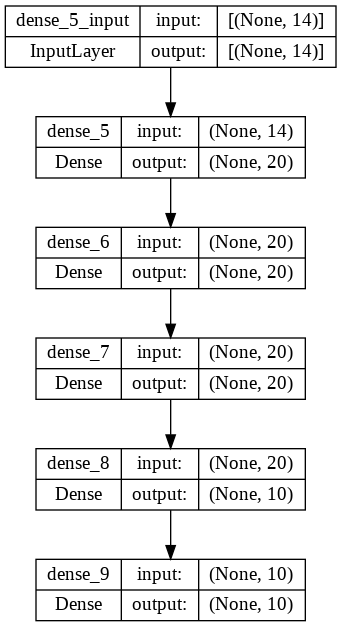

In [54]:
from tensorflow.keras.utils import plot_model
print(m2.summary())
plot_model(m2, to_file='m2.png', show_shapes=True, show_layer_names=True)

#random forest

In [108]:
labels = np.array(y)

In [109]:

features = np.array(X)

In [110]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)


In [111]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2052, 14)
Training Labels Shape: (2052,)
Testing Features Shape: (685, 14)
Testing Labels Shape: (685,)


In [112]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [113]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.01 degrees.


In [114]:
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
graph5= round(accuracy, 2)

Accuracy: 99.78 %.


In [115]:
graph5

99.78

In [62]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:

from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

#xgboost


In [64]:
!pip3 install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [66]:
modelXG = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [67]:
modelXG.fit(X_train, y_train)


XGBClassifier(eval_metric='mlogloss', objective='multi:softprob',
              use_label_encoder=False)

In [68]:
y_predxg = modelXG.predict(X_test)


In [69]:
graph6 = accuracy_score(y_test, y_predxg)
accuracy

99.78491484184914

In [70]:
print(classification_report(y_test,y_predxg))


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        78
         2.0       1.00      1.00      1.00        83
         3.0       1.00      0.99      0.99        77
         5.0       0.98      1.00      0.99        80
         6.0       1.00      1.00      1.00        80
         7.0       1.00      0.99      0.99        76
         8.0       1.00      1.00      1.00        74

    accuracy                           1.00       548
   macro avg       1.00      1.00      1.00       548
weighted avg       1.00      1.00      1.00       548



In [71]:
acc_list=[graph,graph2,graph3,graph4,graph5,graph6]

In [72]:
graph6

0.9963503649635036

In [74]:
graph

0.9945255474452555

In [102]:
graph = graph.item()
graph2 = graph2.item()
graph3 = graph3.item()
graph4 = graph4.item()
graph5 = graph5.item()
graph6 = graph6.item()

In [103]:
graph = graph*100
graph2=graph2*100
graph3 = graph3*100
graph4 = graph4*100
graph6 = graph6*100

In [116]:
acc_list=[graph,graph2,graph3,graph4,graph5,graph6]

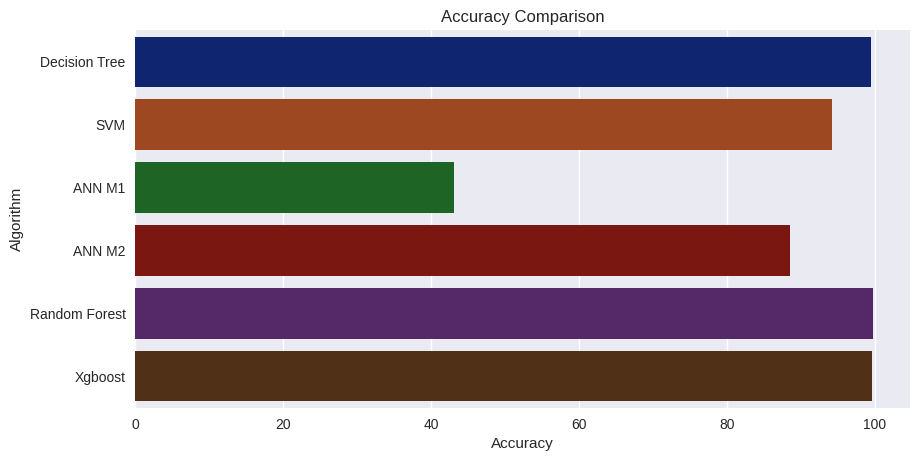

In [117]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc_list,y = index,palette='dark')

In [118]:
acc_list

[99.45255474452554,
 94.16058394160584,
 43.06569343065693,
 88.5036496350365,
 99.78,
 99.63503649635037]

In [78]:
index= ['Decision Tree',"SVM","ANN M1","ANN M2","Random Forest","Xgboost"]

#prediction function

In [ ]:
#Using ANN Model-2 for the prediction of the crops that are to be grown

In [81]:
my = df[['pH', 'EC', 'OC', 'N', 'P', 'K', 'S', 'Ca', 'Mg', 'Zn', 'Cu',
       'Fe', 'Mn','Tex']]

In [82]:
ph = 5.6
ec = 0.12
oc = 8.46
n = 190.2
p = 20.42
k = 268.2
s = 9.4
ca = 1322
mg = 400
zn = 1.42
cu = 0.21
fe = 15.6
mn = 16.5
tex = 5

lst = [[ph, ec, oc, n, p, k, s, ca, mg, zn, cu, fe, mn, tex]]
arr = np.array(lst)
mean = np.array(my.mean())
std = np.array(my.std())
arr = (arr-mean)/std

In [83]:
pred = m2.predict(arr)
pred.argmax(axis=1)[0]
print(crop_name[pred.argmax(axis=1)[0]])

1/1 [==============================] - 0s 33ms/step
['Apple', 'Grape', 'Pomegranate']


#District Prediction

In [ ]:
# Customized model to get the Distrcit prediction

In [84]:
X1 = df[['pH', 'EC', 'OC', 'N', 'P', 'K', 'S', 'Ca', 'Mg', 'Zn', 'Cu',
       'Fe', 'Mn','Tex']]
Y1 = df[['District']]

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y1.District= le.fit_transform(df.District.values)
X1.Tex= le.fit_transform(df.Tex.values)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [86]:
X1

,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,Tex
0,7.050000,0.160000,5.560000,175.620000,38.260000,324.800000,5.210000,1884,288.000000,1.820000,0.200000,2.830000,2.800000,2
1,6.880000,0.089000,4.240000,125.440000,26.300000,103.000000,10.420000,1484,336.000000,1.620000,0.450000,6.270000,5.600000,2
2,5.600000,0.081000,2.780000,150.530000,25.700000,53.800000,7.810000,1644,504.000000,2.840000,0.440000,21.080000,24.110000,5
3,7.300000,0.164000,10.540000,188.160000,24.700000,190.400000,10.420000,1364,840.000000,7.740000,0.630000,16.420000,11.400000,2
4,7.220000,0.167000,11.410000,163.070000,40.000000,210.600000,10.420000,2004,168.000000,11.890000,0.610000,7.380000,2.910000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,6.531352,0.659126,17.283696,507.723181,28.210970,99.076266,464.099932,57,1.407825,0.908700,26.714008,20.307160,8.306451,14
2733,6.570766,0.672140,17.198919,507.854437,28.107230,99.429503,462.612618,60,1.410428,0.898288,25.791129,19.426670,8.329504,14
2734,6.989972,0.810557,16.297230,509.250472,27.003848,103.186541,446.793514,93,1.438111,0.787555,15.975375,10.061760,8.574701,16
2735,6.737222,0.727102,16.840881,508.408768,27.669104,100.921331,456.331240,73,1.421420,0.854319,21.893534,15.708094,8.426866,15


In [87]:
Y1['District'].unique()

array([0, 2, 1])

In [88]:
X1 = (X1 - X1.mean())/X1.std()
X1

,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,Tex
0,1.048506,-1.037491,-1.677114,-1.226424,0.557077,1.249438,-1.023138,1.526581,0.178608,-0.192447,-0.946238,-1.027180,-0.943989,-2.426073
1,0.650186,-1.200279,-1.911359,-1.594217,-0.124451,-0.593699,-1.014431,1.071609,0.288384,-0.255630,-0.931182,-0.754868,-0.599579,-2.426073
2,-2.348933,-1.218622,-2.170448,-1.410321,-0.158642,-1.002546,-1.018793,1.253598,0.672599,0.129790,-0.931784,0.417502,1.677216,-1.721297
3,1.634272,-1.028320,-0.793373,-1.134513,-0.215626,0.132587,-1.014431,0.935117,1.441030,1.677788,-0.920342,0.048613,0.113841,-2.426073
4,1.446827,-1.021441,-0.638984,-1.318409,0.656229,0.300447,-1.014431,1.663073,-0.095832,2.988847,-0.921546,-0.666999,-0.930458,-2.426073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,-0.166718,0.106901,0.403351,1.207717,-0.015557,-0.626305,-0.256227,-0.551505,-0.476827,-0.480343,0.650537,0.356323,-0.266676,0.393030
2733,-0.074369,0.136739,0.388306,1.208679,-0.021468,-0.623369,-0.258713,-0.548092,-0.476821,-0.483632,0.594957,0.286623,-0.263840,0.393030
2734,0.907857,0.454101,0.228294,1.218911,-0.084343,-0.592149,-0.285150,-0.510557,-0.476758,-0.518615,0.003815,-0.454709,-0.233680,0.862880
2735,0.315649,0.262756,0.324770,1.212742,-0.046434,-0.610972,-0.269211,-0.533306,-0.476796,-0.497523,0.360229,-0.007742,-0.251865,0.627955


In [89]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(2189, 14) (548, 14) (2189, 1) (548, 1)


In [90]:
X1_train = np.asarray(X1_train).astype(np.float32)

X1_test = np.asarray(X1_test).astype(np.float32)


In [91]:
hp_hidden_units = 45
hp_epoch = 10
hp_batch_size = 3
hp_lr = float(1/10)

In [92]:
l1 = Dense(40)
l2 = Dense(35, activation = tf.nn.relu)
l3 = Dense(20)
l4 = Dense(10, activation = tf.nn.softmax)
d = keras.models.Sequential(
    [l1, l2, l3, l4]
)


In [93]:
from tensorflow.keras.layers import Flatten, Dense, InputLayer

In [94]:
d.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           optimizer='adam',
           metrics=["accuracy"])


In [95]:
history3 =d.fit(X1_train, y1_train, batch_size= 10, epochs=3)

Epoch 1/3
219/219 [==============================] - 1s 2ms/step - loss: 1.6086 - accuracy: 0.9059
Epoch 2/3
219/219 [==============================] - 0s 1ms/step - loss: 1.4762 - accuracy: 0.9868
Epoch 3/3
219/219 [==============================] - 0s 1ms/step - loss: 1.4749 - accuracy: 0.9868


In [96]:
districts = { 0 : ["Almora"], 1 : ["Tehri"], 2 : ["Chamoli"]}

In [97]:
predsd = d.predict(X1_test)

18/18 [==============================] - 0s 1ms/step


In [98]:
districts[np.argmax(predsd[50])]

['Tehri']

#Fertility Scale

In [99]:
n = 0
p = 0
k = 0
s = 0
oc = 0
ca = 0
score = 0

label = []

In [100]:
for i in range(df.shape[0]):
    if(df.loc[i]['N']<=280):
        n=1
    elif(df.loc[i]['N']>280 and df.loc[i]['N']<=560):
        n=2
    elif(df.loc[i]['N']>560):
        n=3
        
        
    
    if(df.loc[i]['P']<=10):
        p=1
    elif(df.loc[i]['P']>10 and df.loc[i]['P']<=24.6):
        p=2
    elif(df.loc[i]['P']>24.6):
        p=3
        
        
        
    if(df.loc[i]['K']<=117.6):
        k=1
    elif(df.loc[i]['K']>117.6 and df.loc[i]['K']<=280):
        k=2
    elif(df.loc[i]['K']>280):
        k=3
        
    if(df.loc[i]['S']<=10):
        s=1
    elif(df.loc[i]['S']>10 and df.loc[i]['S']<=20):
        s=2
    elif(df.loc[i]['S']>20):
        s=3
        
    if(df.loc[i]['OC']<=0.5):
        oc=3
    elif(df.loc[i]['OC']>0.5 and df.loc[i]['OC']<=0.75):
        oc=6
    elif(df.loc[i]['OC']>0.75):
        oc=9
        
    if(df.loc[i]['Ca']<=2500):
        ca=1
    elif(df.loc[i]['Ca']>2500 and df.loc[i]['Ca']<=4000):
        ca=2
    elif(df.loc[i]['Ca']>4000):
        ca=3   
        
    score = ((n+p+k+s+oc+ca)*10)/28.35
    
    
    label.append((score))

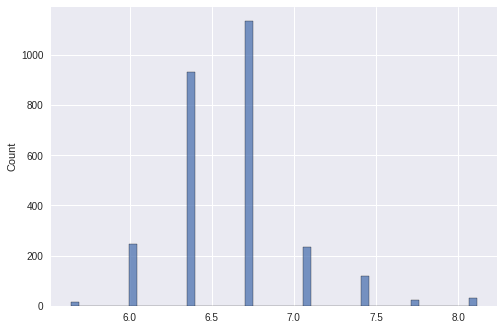

In [101]:
sns.histplot(label)